In [1]:
import torch
import numpy as np
import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [4]:
dataset = MNIST(root='data/',
               download=True,
               transform=ToTensor())


Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw




Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw




Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw




Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw



In [5]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
len(dataset)

60000

In [7]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [8]:
img, label = dataset[0]
img.shape, label

(torch.Size([1, 28, 28]), 5)

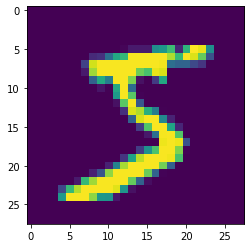

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img[0])

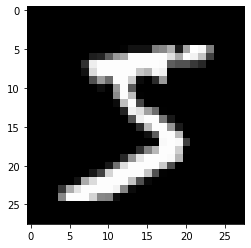

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img[0], cmap='gray')

In [11]:
img[0,10:15,10:15]

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])

In [12]:
def split_indices(n, val_pct):
    n_val = int(val_pct*n)
    idxs = np.random.permutation(n)
    return idxs[n_val:], idxs[:n_val]

In [13]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)

print(len(train_indices), len(val_indices))
print('Sample val indices: ', val_indices[:20])

48000 12000
Sample val indices:  [46277 46081 15187 14930 30122 41298 53357 33160  1759 13183 33361  8626
 45889 30377 12908 32040 20806 50202 20670 12517]


In [14]:
batch_size=100

train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset,
                     batch_size,
                     sampler=train_sampler)

valid_sampler = SubsetRandomSampler(val_indices)
valid_dl = DataLoader(dataset,
                     batch_size,
                     sampler=valid_sampler)

In [15]:
import torch.nn.functional as F
import torch.nn as nn

In [22]:
t = torch.tensor([0, .2, -0.3])
F.relu(t)

tensor([0.0000, 0.2000, 0.0000])

In [17]:
for xb, yb in train_dl:
    print(xb.shape)
    break

torch.Size([100, 1, 28, 28])


In [18]:
for xb, yb in train_dl:
    xb = xb.view(100,784)
    print(xb.shape)
    break

torch.Size([100, 784])


In [19]:
for xb, yb in train_dl:
    xb = xb.view(xb.size(0),784)
    print(xb.shape)
    break

torch.Size([100, 784])


In [20]:
for xb, yb in train_dl:
    xb = xb.view(xb.size(0),-1)
    print(xb.shape)
    break

torch.Size([100, 784])


In [21]:
class MnistModel(nn.Module):
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        self.linear1 = nn.Linear(in_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        xb = xb.view(xb.size(0), -1)
        out = self.linear1(xb)
        out = F.relu(out)
        out = self.linear2(out)
        return out

In [23]:
input_size = 784
num_classes = 10

model = MnistModel(input_size, hidden_size=32,
                  out_size=num_classes)

In [24]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [25]:
for images, labels in train_dl:
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print('Loss:', loss.item())
    break
    
print('outputs.shape : ', outputs.shape)
print('Sample outputs : \n', outputs[:2].data)

Loss: 2.3269333839416504
outputs.shape :  torch.Size([100, 10])
Sample outputs : 
 tensor([[-0.0594, -0.0412, -0.0018,  0.1565, -0.1862,  0.1073,  0.2285,  0.2666,
          0.0018, -0.0710],
        [-0.0059, -0.0635,  0.0169,  0.1293, -0.1680,  0.0699,  0.1647,  0.1953,
          0.1054, -0.0559]])


In [26]:
for images, labels in train_dl:
    print('images.shape', images)
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print('Loss:', loss.item())
    break
    
print('outputs.shape : ', outputs.shape)
print('Sample outputs : \n', outputs[:2].data)

images.shape tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0.,

In [27]:
for images, labels in train_dl:
    print('images.shape', images.shape)
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print('Loss:', loss.item())
    break
    
print('outputs.shape : ', outputs.shape)
print('Sample outputs : \n', outputs[:2].data)

images.shape torch.Size([100, 1, 28, 28])
Loss: 2.310971260070801
outputs.shape :  torch.Size([100, 10])
Sample outputs : 
 tensor([[-0.0351, -0.1250, -0.0023,  0.1055, -0.1477,  0.0680,  0.1820,  0.1484,
          0.0070, -0.0470],
        [-0.0010, -0.0799, -0.0547,  0.1013, -0.1470,  0.0892,  0.1863,  0.2461,
          0.0114, -0.0088]])


In [28]:
for images, labels in train_dl:
    print('images.shape', images.shape)
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print('Loss:', loss.item())
    break
    
print('outputs.shape : ', outputs.shape)
print('Sample outputs : \n', F.softmax(outputs)[:2].data)

images.shape torch.Size([100, 1, 28, 28])
Loss: 2.3109989166259766
outputs.shape :  torch.Size([100, 10])
Sample outputs : 
 tensor([[0.0962, 0.0875, 0.0982, 0.1083, 0.0823, 0.1027, 0.1169, 0.1128, 0.0999,
         0.0952],
        [0.0982, 0.0888, 0.0973, 0.1066, 0.0810, 0.1038, 0.1123, 0.1080, 0.1016,
         0.1024]])


<ipython-input-28-39aa7011b971>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print('Sample outputs : \n', F.softmax(outputs)[:2].data)


In [30]:
for images, labels in train_dl:
    print('images.shape', images.shape)
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print('Loss:', loss.item())
    break
    
print('outputs.shape : ', outputs.shape)
print('Sample outputs : \n', torch.sum(F.softmax(outputs)[0]))

images.shape torch.Size([100, 1, 28, 28])
Loss: 2.3207006454467773
outputs.shape :  torch.Size([100, 10])
Sample outputs : 
 tensor(1.0000, grad_fn=<SumBackward0>)


<ipython-input-30-003410f4f1bd>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print('Sample outputs : \n', torch.sum(F.softmax(outputs)[0]))
